In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D 

LOAD THE DATA

In [39]:
data = pd.read_csv('retailcustomerstrimmed.csv', index_col='Customer')

In [40]:
data.describe()

,Purchases,Sales,Months
count,24509.000000,24509.000000,24509.000000
mean,1.548370,738.472494,5.313803
std,8.778251,4760.854077,19.615564
min,1.000000,0.000000,0.000000
25%,1.000000,298.000000,0.000000
50%,1.000000,446.000000,0.000000
75%,1.000000,708.000000,0.000000
max,897.000000,516320.720000,185.000000


In [41]:
data.head()

,Purchases,Sales,Months
Customer,,,
1-1006583,897,516320.72,45
1-1005290,727,321443.13,35
1-1006355,490,201264.19,47
1-1000050,325,130787.10,19
1-1005671,276,124223.92,0


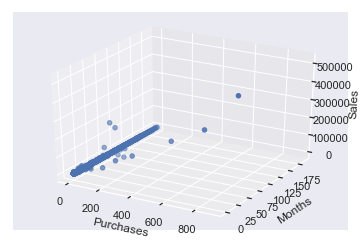

In [42]:
# plt.scatter(data['Purchases'],data['Sales'], data['Months'])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter( data['Purchases'], data['Months'], data['Sales'],cmap='rainbow')

ax.set_xlabel('Purchases')
ax.set_ylabel('Months')
ax.set_zlabel('Sales')

plt.show( )

SELECT THE FEATURES

In [43]:
x = data.iloc[:,0:3 ]

In [44]:
x.head()

,Purchases,Sales,Months
Customer,,,
1-1006583,897,516320.72,45
1-1005290,727,321443.13,35
1-1006355,490,201264.19,47
1-1000050,325,130787.10,19
1-1005671,276,124223.92,0


CLUSTERING

In [45]:
kmeans = KMeans(3)

In [46]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

CLUSTERING RESULTS

In [47]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 2, ..., 0, 0, 0])

In [48]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters.head()

,Purchases,Sales,Months,Cluster
Customer,,,,
1-1006583,897,516320.72,45,1
1-1005290,727,321443.13,35,1
1-1006355,490,201264.19,47,2
1-1000050,325,130787.10,19,2
1-1005671,276,124223.92,0,2


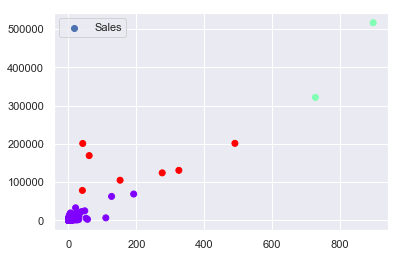

In [49]:
plt.scatter(data_with_clusters['Purchases'], data_with_clusters['Sales'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.legend(loc='upper left')
plt.show()

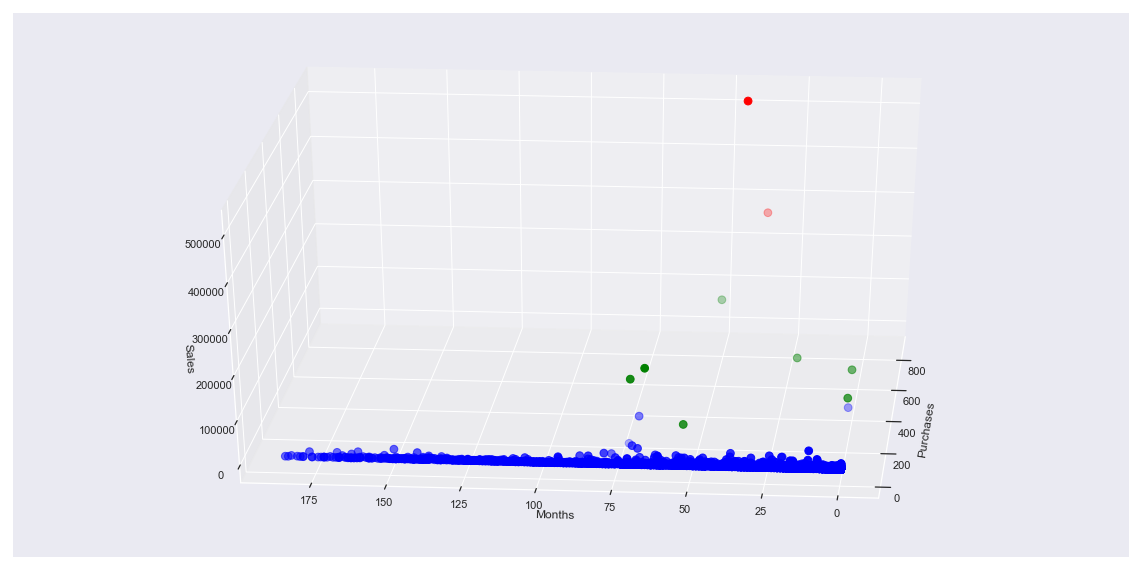

In [50]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_with_clusters.Purchases[data_with_clusters.Cluster == 0], data_with_clusters["Months"][data_with_clusters.Cluster == 0], data_with_clusters["Sales"][data_with_clusters.Cluster == 0], c='blue', s=60)
ax.scatter(data_with_clusters.Purchases[data_with_clusters.Cluster == 1], data_with_clusters["Months"][data_with_clusters.Cluster == 1], data_with_clusters["Sales"][data_with_clusters.Cluster == 1], c='red', s=60)
ax.scatter(data_with_clusters.Purchases[data_with_clusters.Cluster == 2], data_with_clusters["Months"][data_with_clusters.Cluster == 2], data_with_clusters["Sales"][data_with_clusters.Cluster == 2], c='green', s=60)
ax.view_init(30, 185)
plt.xlabel("Purchases")
plt.ylabel("Months")
ax.set_zlabel('Sales')
plt.show()

SELECTING THE NUMBER OF CLUSTERS

WCSS

In [51]:
kmeans.inertia_

61468996699.16262

In [52]:
wcss = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)


In [53]:
wcss

[555503067117.105,
 160246917799.9117,
 61468996699.16262,
 38164397053.48038,
 25310231000.8037,
 15132266241.80163,
 10442469940.035341,
 6690155785.357235,
 4684924770.612669]

THE ELBOW METHOD

Text(0,0.5,'Within-cluster Sum of Squares')

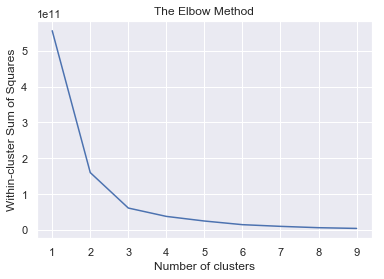

In [54]:
number_clusters = range(1,10)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

In [55]:
#Analyze cluster distribution and average # of purchases per cluster
pd.pivot_table(data_with_clusters,index=["Cluster"],
               values=["Purchases"],
               aggfunc=[len, np.mean],fill_value=0,margins=True)

,len,mean
,Purchases,Purchases
Cluster,,
0,24500,1.426041
1,2,812.000000
2,7,198.142857
All,24509,1.548370


In [56]:
#Isolate first cluster
cluster_zero = data_with_clusters[data_with_clusters['Cluster'] == 0]
cluster_zero = cluster_zero.iloc[:,0:3 ]

Text(0,0.5,'Within-cluster Sum of Squares')

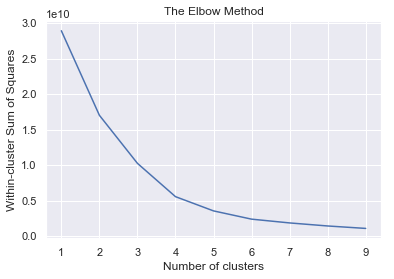

In [57]:
#Visualize elbow for first cluster data
wcss_zero = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(cluster_zero)
    wcss_iter = kmeans.inertia_
    wcss_zero.append(wcss_iter)
number_clusters = range(1,10)
plt.plot(number_clusters, wcss_zero)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')


In [58]:
#Apply Kmeans algorithm
kmeans = KMeans(4)
kmeans.fit(cluster_zero)
identified_clusters_zero = kmeans.fit_predict(cluster_zero)
cluster_zero_copy = cluster_zero.copy()
cluster_zero_copy['Cluster'] = identified_clusters_zero




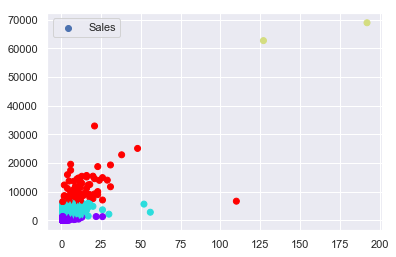

In [59]:
#2D Visualization
plt.scatter(cluster_zero_copy['Purchases'], cluster_zero_copy['Sales'], c=cluster_zero_copy['Cluster'], cmap='rainbow')
plt.legend(loc='upper left')
plt.show()

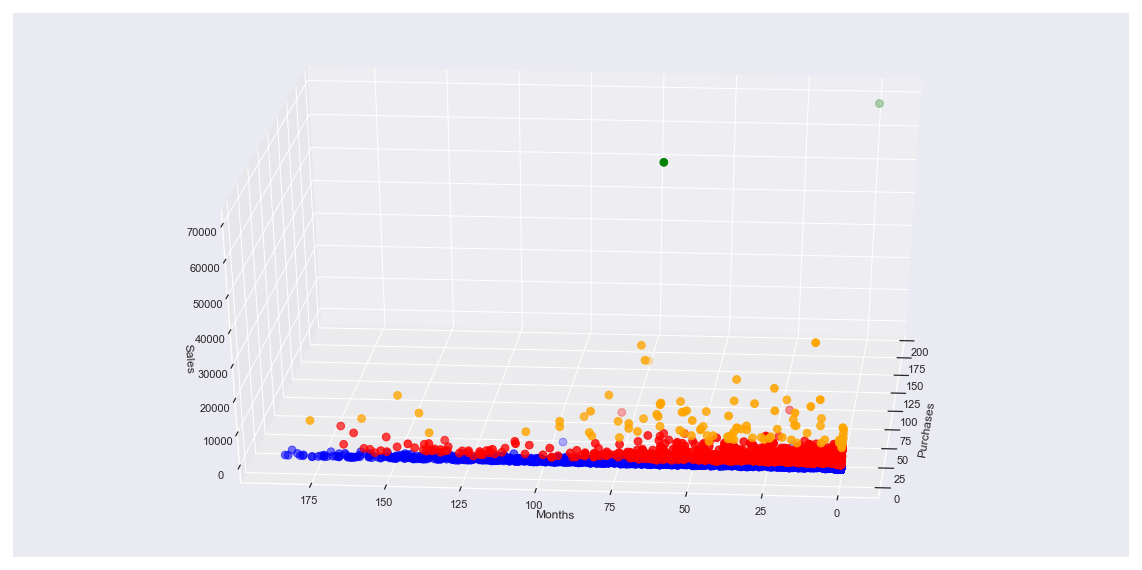

In [60]:
#3D Visualization
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster_zero_copy.Purchases[cluster_zero_copy.Cluster == 0], cluster_zero_copy["Months"][cluster_zero_copy.Cluster == 0], cluster_zero_copy["Sales"][cluster_zero_copy.Cluster == 0], c='blue', s=60)
ax.scatter(cluster_zero_copy.Purchases[cluster_zero_copy.Cluster == 1], cluster_zero_copy["Months"][cluster_zero_copy.Cluster == 1], cluster_zero_copy["Sales"][cluster_zero_copy.Cluster == 1], c='red', s=60)
ax.scatter(cluster_zero_copy.Purchases[cluster_zero_copy.Cluster == 2], cluster_zero_copy["Months"][cluster_zero_copy.Cluster == 2], cluster_zero_copy["Sales"][cluster_zero_copy.Cluster == 2], c='green', s=60)
ax.scatter(cluster_zero_copy.Purchases[cluster_zero_copy.Cluster == 3], cluster_zero_copy["Months"][cluster_zero_copy.Cluster == 3], cluster_zero_copy["Sales"][cluster_zero_copy.Cluster == 3], c='orange', s=60)
ax.view_init(30, 185)
plt.xlabel("Purchases")
plt.ylabel("Months")
ax.set_zlabel('Sales')
plt.show()

In [61]:
#Analyze cluster distribution and average # of purchases per cluster
pd.pivot_table(cluster_zero_copy,index=["Cluster"],
               values=["Purchases"],
               aggfunc=[len, np.mean],fill_value=0,margins=True)

,len,mean
,Purchases,Purchases
Cluster,,
0,22563,1.218943
1,1840,3.199457
2,2,159.500000
3,95,12.936842
All,24500,1.426041


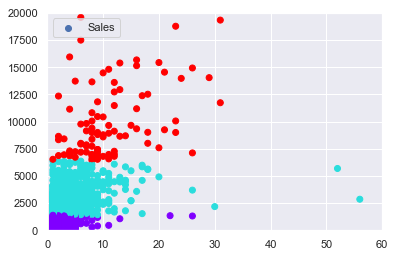

In [62]:
#Focused 2D Visualization
plt.scatter(cluster_zero_copy['Purchases'], cluster_zero_copy['Sales'], c=cluster_zero_copy['Cluster'], cmap='rainbow')
plt.legend(loc='upper left')
plt.xlim(0, 60)
plt.ylim(0, 20000)
plt.show()